In [1]:
from math import pi, cos, sin, sqrt
from random import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def xi(R=1):
    # r = R * sqrt(random())
    r = R
    theta = 2 * pi * random()
    return r * cos(theta), r * sin(theta)

def replicate(func, Ntrials=10_000):
    xx, yy = [], []
    for _ in range(Ntrials):
        xp, yp = xi()
        xx.append(xp)
        yy.append(yp)
    return xx, yy

def X_n(p0=(0, 0), n=0):
    x0, y0 = p0
    xi_xx, xi_yy = replicate(xi, n)
    for k in range(n):
        xi_xx[k] /= (2**(k+1))
        xi_yy[k] /= (2**(k+1))
    return (x0 / (2**n)) + sum(xi_xx), (y0 / (2**n)) + sum(xi_yy)

def mu_n(p0=(0, 0), n=0, N=1):
    x0, y0 = p0
    xx0, yy0 = [x0] * N, [y0] * N

    xx, yy = [0] * N, [0] * N
    for i in range(N):
        xx[i], yy[i] = X_n((xx0[i], yy0[i]), n)

    return xx, yy

def draw_mu_n(xx, yy):
    plt.rcParams["figure.figsize"] = (6,6)
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.gca().add_patch(plt.Circle((0, 0), 1, color='orange', fill=False))
    plt.title(r'Limit distribution for $\mu = U(\mathbf{С^1})$')

    plt.scatter(xx, yy, s=1, label=f"N = {len(xx)}")
    plt.legend()


def show_pdf_marginal(xx, title="", bar_len=50):
    pdf = plt.hist(xx, len(xx) // bar_len, density=True, label=f"N = {len(xx)}")
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title(title)
    plt.legend()
    plt.show()

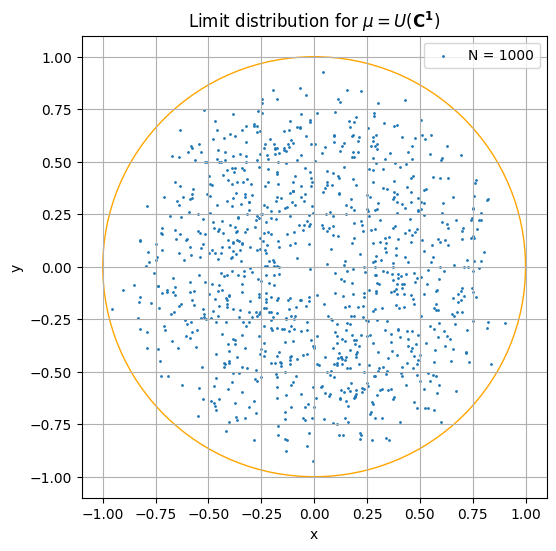

In [2]:
N=1_000
xx_n, yy_n = mu_n(n=100, N=N)
draw_mu_n(xx_n, yy_n)

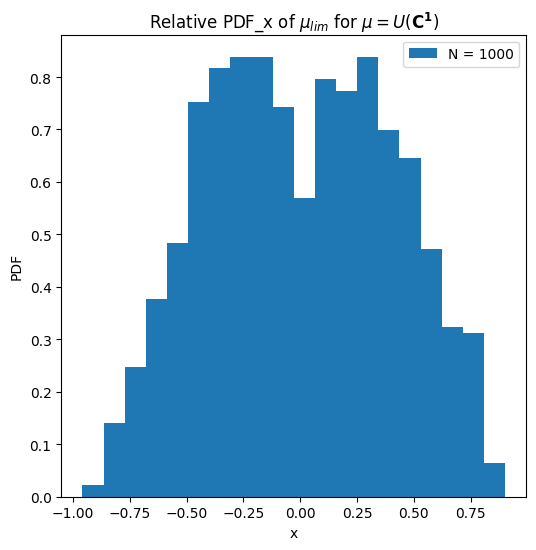

In [3]:
show_pdf_marginal(xx_n, title=r'Relative PDF_x of $ \mu _{lim} $ for $\mu = U(\mathbf{C^1})$')

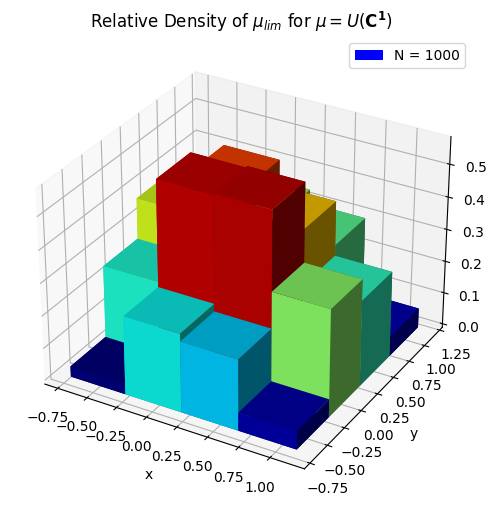

In [4]:
def show_pdf_3D(xx, yy, bar_len=500):
    xx, yy = np.array(xx), np.array(yy)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    hist, xedges, yedges = np.histogram2d(xx, yy, bins=(N // bar_len, N // bar_len), density=True)
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    dz = hist.flatten()

    cmap = matplotlib.colormaps.get_cmap('jet')
    max_height = np.max(dz)
    min_height = np.min(dz)
    rgba = [cmap((k-min_height)/max_height) for k in dz]

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
    plt.title(r"Relative Density of $\mu _{lim} $ for $\mu = U(\mathbf{C^1})$")
    plt.xlabel('x')
    plt.ylabel('y')
    leg = plt.Rectangle((0, 0), 1, 1, fc="b")
    ax.legend([leg], [f'N = {len(xx)}'])

    plt.show()

show_pdf_3D(xx_n, yy_n, bar_len=250)

In [5]:
print(np.mean(xx_n), np.mean(yy_n))
print(np.var(xx_n), np.var(yy_n))

0.0008857868014384844 -0.014963606176395913
0.16459940348076127 0.16652383266138718
